In [1]:
%matplotlib notebook

from islpy import *
import numpy as np
from IPython.display import Image
from simplify.plot import plot_3d_sets
from islpy import BasicSet, BasicMap

In [2]:
def split(s, aff_str=None, face=None):
    if not aff_str and not face:
        return [s]
    if aff_str:
        cut = BasicSet('{{[i,j,k] : {}}}'.format(aff_str))
    else:
        cut = face
    # build two pieces with 
    i = s.intersect(cut)
    diff = s - i
    p1, p2 = diff.get_basic_sets()
    p1 = p1.union(i).convex_hull()
    return [p1, p2]

# 1D accumulation & 2D reuse

We have the following base cases and general cases.

## Base B1 - good tetrahedron - 1 boundary face, 1 invariant face

<IPython.core.display.Javascript object>


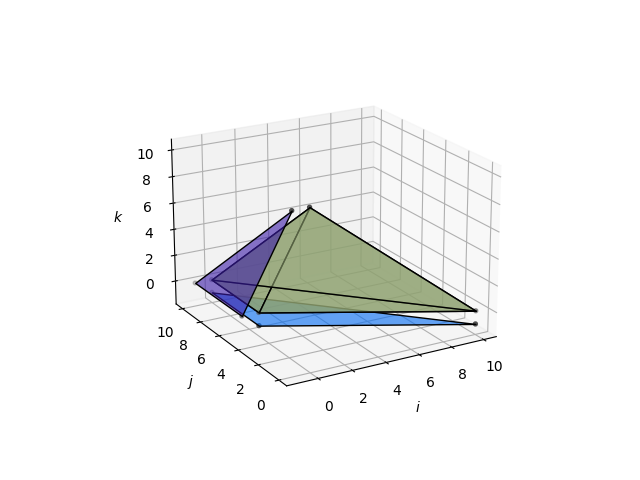

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [3]:
s = Set('{[0,5,0]; [10,0,0]; [0,10,0]; [0,0,10];}').convex_hull()

i = Set('{[0,5,0]; [10,0,0]; [0,10,0];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j,k-1]}'))
b = Set('{[0,5,0]; [0,10,0]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))

plot_3d_sets([s, i, b])

## Base B2 - good tetrahedron - 2 acute boundary faces

<IPython.core.display.Javascript object>


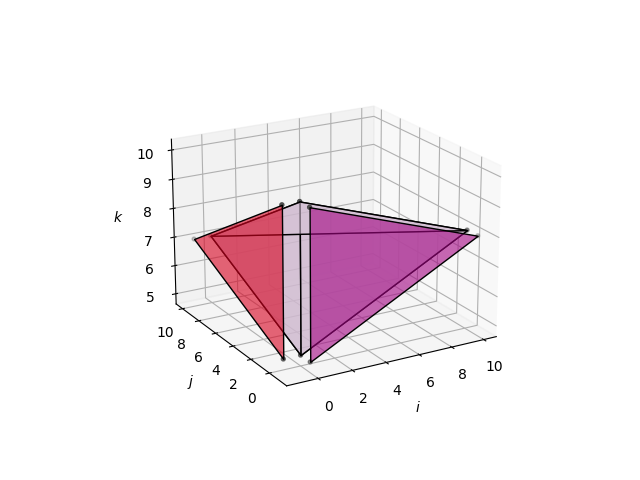

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [4]:
# 2 acute boundary faces
s = Set('{[0,0,5]; [10,0,8]; [0,10,7]; [0,0,10];}').convex_hull()
S = [s]

b1 = Set('{[0,0,5]; [0,10,7]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))
b2 = Set('{[0,0,5]; [10,0,8]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j-1,k]}'))
S += [b1, b2]

plot_3d_sets(S)

## Scenario 1) 1 invariant face, 3 oblique faces

## Scenario 1a) 1 invariant face, 3 oblique faces, top vertex interior

<IPython.core.display.Javascript object>


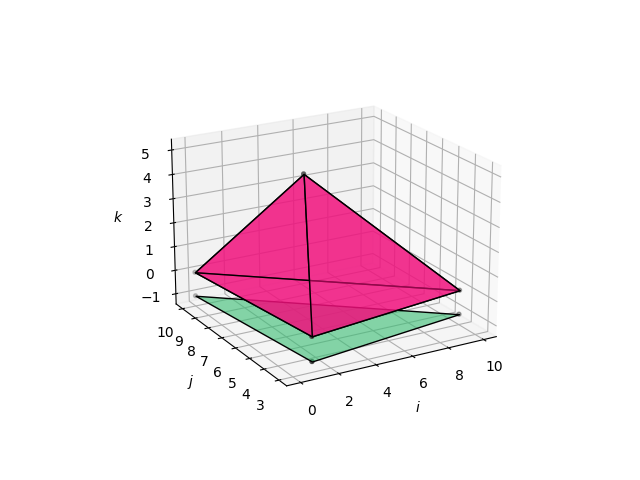

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [5]:
# 1 invariant face
# subcase - top vertex interior
s = Set('{[1,3,0]; [10,4,0]; [0,10,0]; [3,6,5];}').convex_hull()
S = [s]

i1 = Set('{[1,3,0]; [10,4,0]; [0,10,0];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j,k-1]}'))
S += [i1]

plot_3d_sets(S)

### resolution - single boundary cut through any top edge produces 2 good B1 tetrahedra

<IPython.core.display.Javascript object>


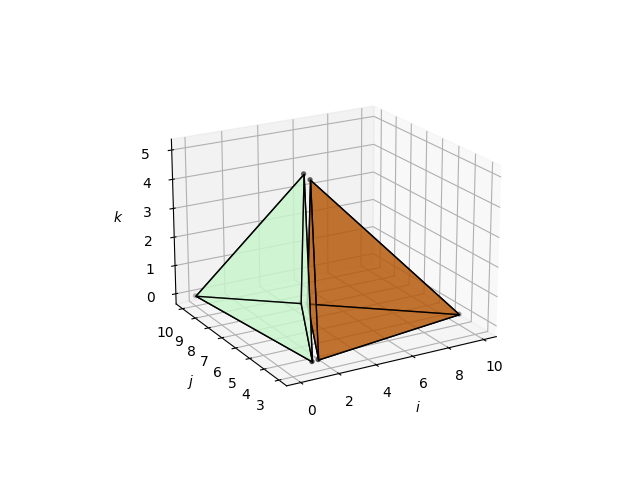

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [6]:
# 1 invariant face
# subcase - top vertex interior
s = Set('{[1,3,0]; [10,4,0]; [0,10,0]; [3,6,5];}').convex_hull()

# resolution
S = split(s, "3i=2j-2")

plot_3d_sets(S)

## Scenario 1b) 1 invariant face, 3 oblique faces, top vertex exterior

<IPython.core.display.Javascript object>


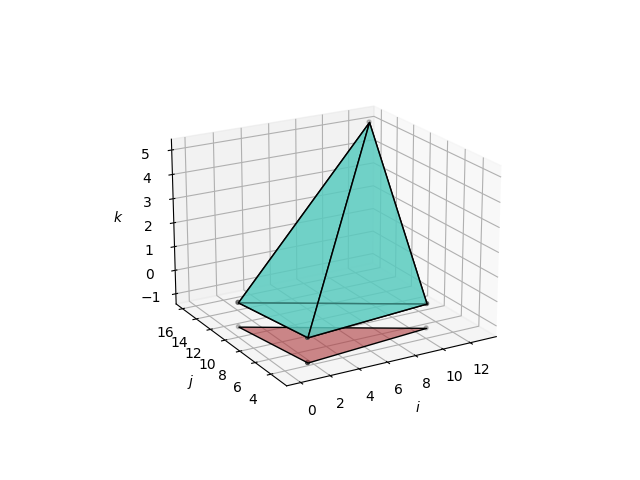

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [7]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[1,3,0]; [10,4,0]; [0,10,0]; [13,16,5];}').convex_hull()
S = [s]

i1 = Set('{[1,3,0]; [10,4,0]; [0,10,0];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j,k-1]}'))
S += [i1]

plot_3d_sets(S)

### resolution - boundary cut through a covered bottom edge gives one good B1 tetrahedron & one in scenario 2

<IPython.core.display.Javascript object>


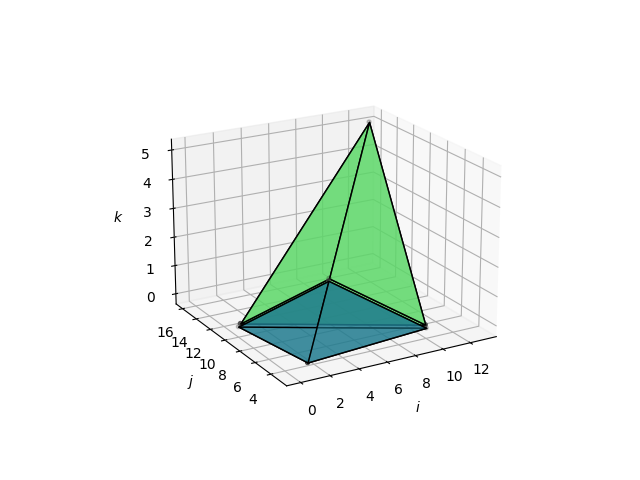

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [8]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[1,3,0]; [10,4,0]; [0,10,0]; [13,16,5];}').convex_hull()

# resolution
S = split(s, "10j=100-6i")

plot_3d_sets(S)

## Scenario 2) 1 boundary face, 3 oblique faces

## Scenario 2a) 1 boundary face, 3 oblique faces - third vertex interior

<IPython.core.display.Javascript object>


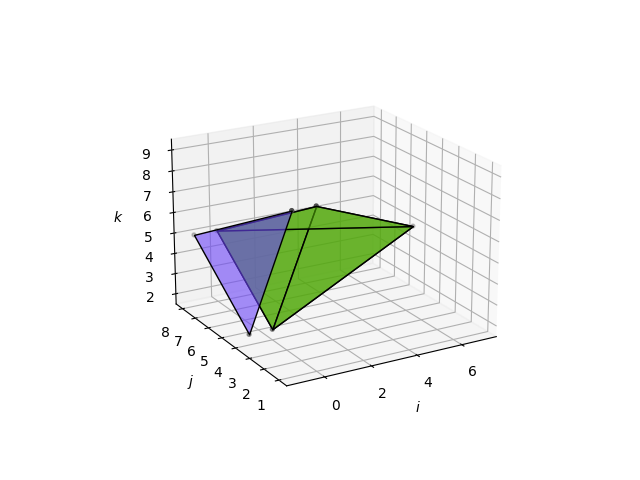

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [9]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[0,4,2]; [0,8,5]; [0,1,9]; [7,5,5];}').convex_hull()
S = [s]

i1 = Set('{[0,4,2]; [0,8,5]; [0,1,9];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))
S += [i1]

plot_3d_sets(S)

### resolution - done, $\exists \rho$ to label all oblique faces as $\oplus$-faces

## Scenario 2b) 1 boundary face, 3 oblique faces - third vertex exterior

<IPython.core.display.Javascript object>


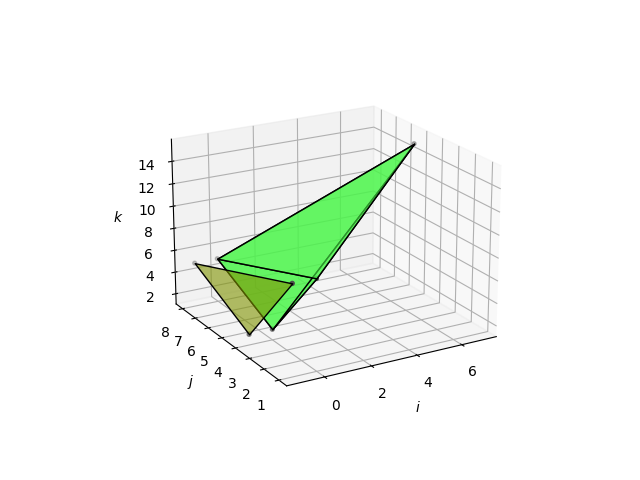

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [10]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[0,4,2]; [0,8,5]; [0,1,9]; [7,5,15];}').convex_hull()
S = [s]

i1 = Set('{[0,4,2]; [0,8,5]; [0,1,9];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))
S += [i1]

plot_3d_sets(S)

### resolution - boundary cut through middle (when projected onto ij-plane) edge gives two pieces in scenario 3

<IPython.core.display.Javascript object>


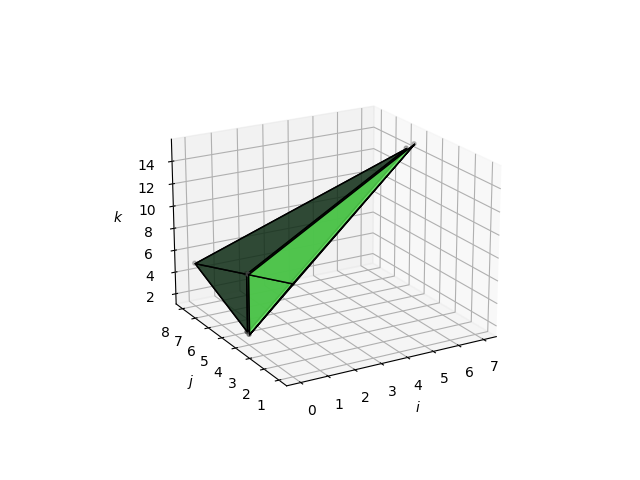

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [11]:
# 1 invariant face
# subcase - top vertex exterior
s = Set('{[0,4,2]; [0,8,5]; [0,1,9]; [7,5,15];}').convex_hull()

# resolution
S = split(s, "7j = 28 + i")

plot_3d_sets(S)

## Scenario 3) 2 boundary faces, 2 oblique faces

## Scenario 3a) 2 SCALENE boundary faces, 2 oblique faces

<IPython.core.display.Javascript object>


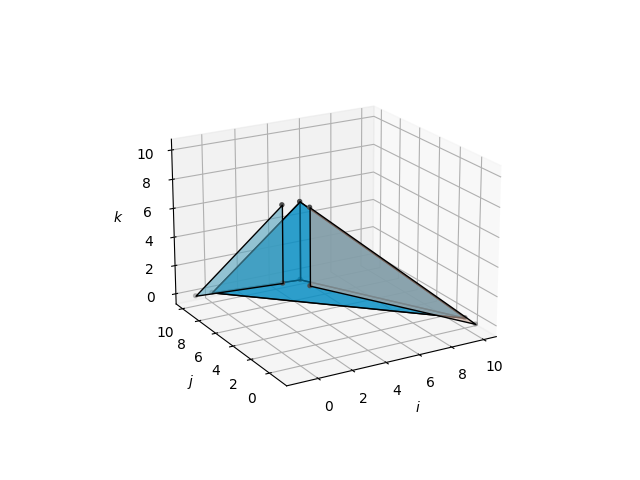

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [12]:
# 2 boundary faces
# subcase - 2 scalene boundary faces
s = Set('{[0,0,5]; [10,0,0]; [0,10,0]; [0,0,10];}').convex_hull()
S = [s]

b1 = Set('{[0,0,5]; [0,10,0]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))
b2 = Set('{[0,0,5]; [10,0,0]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j-1,k]}'))
S += [b1, b2]

plot_3d_sets(S)

### resolution - ???

## Scenario 3b) 1 SCALENE boundary face, 1 ACUTE boundary face, 2 oblique faces

<IPython.core.display.Javascript object>


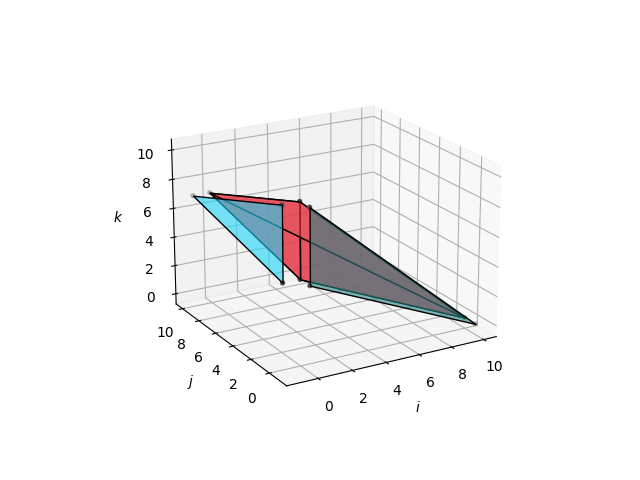

<Axes3DSubplot:xlabel='$i$', ylabel='$j$'>

In [13]:
# 2 boundary faces
# subcase - 1 scalene, 1 acute
s = Set('{[0,0,5]; [10,0,0]; [0,10,7]; [0,0,10];}').convex_hull()
S = [s]

b1 = Set('{[0,0,5]; [0,10,7]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i-1,j,k]}'))
b2 = Set('{[0,0,5]; [10,0,0]; [0,0,10];}').convex_hull().apply(BasicMap('{[i,j,k]->[i,j-1,k]}'))
S += [b1, b2]

plot_3d_sets(S)

### resolution - ???